# Notes on Training Models

From Chapter 4 of Hands-On Machine Learning textbook by Aurelien Geron. 

We will start by looking at Linear Regression. There are two key ways to train these models:
1. **Using direct "closed-form" equation directly computes the model parameters that best fit the mdoel to the training set **(i.e. the model parameters that minimize the cost function over the training set).
2. **Using an iterative optimization approach, called Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method.** We will look at a few variants of Gradient Descent that we will use again and again when we study neural networks in Part II: Batch GD, Mini-batch GD, and Stochastic GD.

Next we look at **Polynomial regression, a mroe complex model that can fit nonlinear datasets. Since this model has more parameters than linear regression, it is more prone to OVERFITTING the training data**, so we will look at how to detect whether or not this is the case, using linear curves, and then we will look at several regulatization techniques that can reduce the risk of overfitting. 

Finally, we will look at Logisitic Regression and Softmax regressions for CLASSIFICATION.

# 1. Linear Regression
A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the **bias term**. We know this already. 
![](pictures/Picture1.png)

So how do we train this ting? 

The most common performance measure of a regression model is the **Root Mean Square Error**. So to train a linear regression model, you need to find the value of the paramter vector that minimizes the RMSE. In practice, it is simpler to minimize the MSE, and it leads to the same result. 

The MSE of a Linear Regression hypothesis on a training set is calculated using this equation:
![](pictures/Picture2.png)

### 1.1 The Normal Equation
To find the value $\theta$ that minimizes the cost function, there is a closed-form solution - in other words, a mathematical equation that gives the result directly. This is called the Normal Equation.

![](pictures/Picture7.png)

- $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function
- $y$ is a the vector of target values containing $y^1$ to $y^m$

Lets generate some linear data to test the equation:

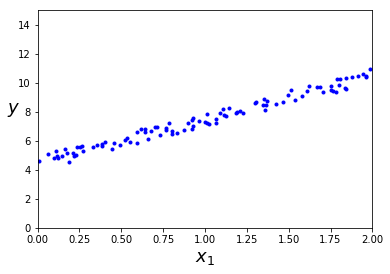

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

**Now lets compute $\hat{\theta}$ using th Normal equation. We will use the inv() function from NumPts Linear Algebra module (np.linalg) to compute the ivnerse of a matrix , and the dot() method for matrix multiplication:**

In [2]:
X_b = np.c_[np.ones((100,1)),X] # add x0 = 1 to eac instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.53322829],
       [ 2.97758117]])

NOTE: the actual function we used to generate the data is y = 4 + 3x + Guasian Noise (normal noise).

So we would have hoped for theta0 = 4 and theta1 = 3, but we got close. The noise is the cause for the difference. Now we can make predictions!

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(X_new_b)
y_predict

[[ 1.  0.]
 [ 1.  2.]]


array([[  4.53322829],
       [ 10.48839063]])

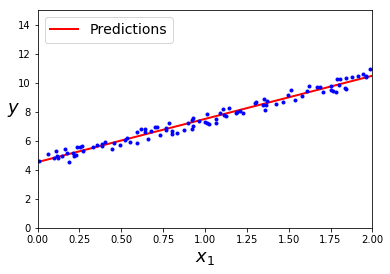

In [4]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
# scikit learn equivalent
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.53322829]), array([[ 2.97758117]]))

In [6]:
lin_reg.predict(X_new)

array([[  4.53322829],
       [ 10.48839063]])

### 1.2 Computational Complexity

The Normal Equation computes the inverse of X^T.dot(X), which is an n*n matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about O(n^2.4) to O(n^3) (depending on the implementation). In other words, if you double the number of features, the multiply the compuation time by roughly 2^2.4=5.3 to 2^3=8 times.

**NOTE: So essentially, the Normal Equation grows VERY slow when the number of features gets large**

On the positive side, the equation is linear with regards to the number of instances in the training set (it is O(m)) so it handles large training sets efficiently, provided they can fit in memory and there arent a ton of features as well!

**Also, one you have trained the model predictions are super fast. The computational complexity is linear with regards to BOTH the number of instances you want to make predictions on and the number of features. Sooo making predictions on twice as many instances (or twice as many features) will just take roughly twice as much time.**

### 1.3 Gradient Descent Basics

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. **The general idea is to tweak parameters iteratively in order to minimize a cost function.**

Gradient Descent measures the local gradient of the error function with regards to paremeter vector $\theta$ and it goes in the direction of the descending gradneitn until it has reach a gradient of zero! That is the minimum!

1. So you start by filing in theta vector with random values (**random initialization**), 
2. Then you improve theta gradually taking one baby step at a time. Each step is attempting to decrease the cost function until the algorithm converges to a minimum

![](pictures/Picture8.png)

**Learning Rate**: An important parameter is the **learning rate hyperparameter.**  If the learning rate is too small, then the algorithm will have to go through many iterations to converge.... which will take WAY too long!!! However if the learning rate is too hihg, you might jump across the valey and end up on the other side!!!!

 Furthermore, not all cost functions look like regular bowls. There may be holes and ridges, plateaus, etc. This makes convergance to the minimum value very difficult. The plot below illustrates this. 
- If the random initialization starts the algo on te left, then it converges to a LOCAL minimum, which is NOT as good as the GLOBAL minimum. 
- If it starts on the right then it will take a very long time to cross the plateau, and if you stop too early you wont reach the GLOBAL minimum.

![](pictures/Picture9.png)

**CONVEX function:** Forunateuly the MSE cost function for a Linear Regression model happens to be a CONEX function, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve (THIS IMPLIES THERE IS NO LOCAL MINIMUM, JUST THE GLOBAL WOOOOOT).

**Linear regression MSE Cost function is also a continuous function with a slope that NEVER CHANGES ABRUPTLY. **

***These two facts (Convex and Continous with consistent slope) have two big consequences for gradient descent: ***

- it is guarunteed to approach abritrarily the Global Minimum (if you wait long enough and if the learning rate is not tooo high).

**Elongated Bowl (different scaled features):** However, the cost function bowl can be eloongated if the features have very different scaled. See the chart below. As you can see, on the left the gradient descent algo goes straight toward the minimmum, wheras on the right it goes in a direction ALMOST ORTHOGONAL to the direction of the global minimum. However in both cases the algo will eventuall reach the SINGLE minimum.
![](pictures/Picture10.png)

<font color=red size=5>**Conclusion**: This means that when using gradient descent, you should ensure that all the features have a similar scale (eg. using Scikit-Learn's StandardScaler class), or else it will take MUCH longer to converge. </font>

**Parameter Space**: The above diagram also illustrates that training a model means searching for a combination of model parameters that minimizes a cost function (over the training set). It is searching in the models parameter space: the more parameters a model has, the more dimensions the space has, and the harder the search is. Fortunately, since the cost function for linear regression is convex, we just need to go to the bottom of the multidimensional bowl!

### 1.4 Batch Gradient Descent 

To implement Gradient Descent you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. **In other words, you need to calculate how much the cost function will change if you change $\theta_j$ just a little bit... This is called a partial derivative. (ie, its the tangent slope of the cost function at that particular spot. So if you reduce the theta_j by one step, the cost function will be reduce by the amount of the slope... I think)**

<font color = red> SO... AGAIN, the Partial derivative is the slope of the tangent line (at a particular spot) of the cost function with respect to the particular theta value.</font>

![](pictures/Picture11.png)

**NOTE: the last formula with ALL of the gradients for each value of theta involves calcualtions over the FULL training set X, at each Gradient Descent step. This is why the algorithm is called BATCH Gradient Descent: it uses the whole batch of training data at EVERY step. As a result, it is terrible slow on LARGE data sets (and there are must faster options). **

- However gradient descent scales well with the number of features; Linear regression training with hundreds of thousands of features is much faster using gradient descent than with the normal equations. 

**Gradient Vector:** Once you have a gradient vector, which points upfill, just go in the opposite direction to go downhill in the cost function bowl!!! Multiply the vector gradient by the the learning rate to determine the size of the downhill step. 

In other words:
- **Positive gradient vector value = Positive slope:** DECREASE PARAMETER: Reduce the value of that particular theta parameter by the gradient value for that parameter * the learning rate. 
- **Negative gradient vector value = Negative slope:** INCREASE PARAMETER: Increase the value of that particular theta parameter by the gradient value for that parameter * the learning rate. 

![](Picture12.emf)


### So remember, you are always trying to reach the GLOBAL MINIMUM, or the bottom of the cost function  bowl. Which means that if the tangent slope is for a paricular parameter is slope down, then you increase that parameter (because you are moving in the right direction)!!!

Here is some quick code to implement this algo:

In [7]:
eta = 0.01 # learning rate
n_iterations = 10000
m = 100

In [8]:
theta = np.random.randn(2,1)
theta

array([[ 0.13785885],
       [ 0.06650038]])

In [9]:
# calculate the gradient vector
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
theta

array([[ 4.53322829],
       [ 2.97758117]])

**That is exactly what the normal euqation found! But what if we had used a different learning rate? The next figure shows the first 10 steps of Gradient Descent using three different learning rate (dashed line is starting point).**

On the left the learning rate is too low. On the right, it is too high, the algorithm diverges jumping all over the place. The middle is just right! Wooohoooo!!! <font color = blue>To find a good learning rate, you can use GridSearch (Chapter 2), however you may want to limit the number of iterations so GridSearch can eliminate models that take too long to converge.</font>


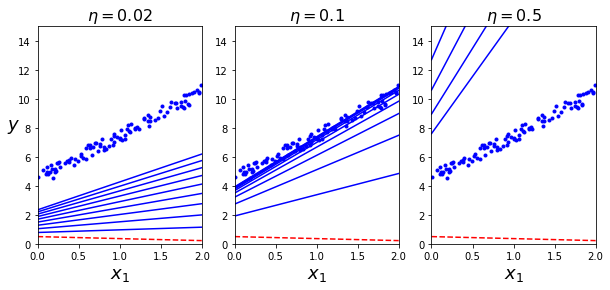

In [10]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

**Convergence Rate**: How do we limit the nmber of iterations? A good solution is to set a large number of iterations but to interrupt the algo when the gradient vector becomes TINY, that is, when its norm becomes smaller than a tiny number epsilon $\epsilon$ (called tolerance), as this happens when the algo has almost reached the minimum (ie the slopes are all almost at zero).

<font color = red size=5> <br>NOTE: When the cost function is convex and its slope DOES NOT change abruptly, as is the case for the MSE cost function in linear regression), it can be shown that Batch gradient Descent with a fixed learning rate has a convergence rate of O(1/iterationts). In other words, if you divide the tolerance $\epsilon$ by 10 (to have a more precise solution), then the algo will have to run about TEN TIME MORE ITERATIONS!!!! </font>

### 1.5 Stochastic Gradient Descent
The main problem with Batch GD is the fact that is uses the WHOLE TRAINING SET to comput the gradients at every step, which makes it very slow when training. **Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based on that single instance.**

Obviously this makes the algo much faster since it has very little data to manipulate at each iteration. It also makes it possible to train on HUGE training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an "out of core algo")

On the other hand, this algo is much less regular than Batch Gradient Descen: instead of gently decreasing untinl it reaches the minimum, the cost funciton will bounce up and down, decreasing only on average. 

![](pictures/Picture14.png)

<font color=blue size = 4> **When the cost function is highly irregular, this can actually help the algo JUMP OUT OF THE LOCAL MINIMA so SGD has a better chance of finding the GLOBAL minimum.**  Therefore, randomness is good to escape local optima, but BAD because it means that to algo never settles at the minimum </font>

**SIMULATED ANNEALING** One solution to this is to gradually reduce the learning rate. The steps start out large (which help make quick progress to escape local minima), then get smaller and smaller, allowing the algo to settle at the GLOBAL minimum. This process is called simulated annealing, because it resembles the process of annealing in metallurgy where molten metal is slowly cooled down (ummmmm okay....). 
- **Learning Schedule:** The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum. If the learning rate is reduced to slowly you may jump around the minimum for a long time and end up with a suboptimal solution if training is halted too early. 

The code below implements Stochastic Gradient Descent using a simple learning schedule (NOTICE THAT THE 'GRADIENTS' VARIABLE ONLY INCLUDE ONE ROW OF DATA... THAT IS THE MAGIC!!!):

In [11]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

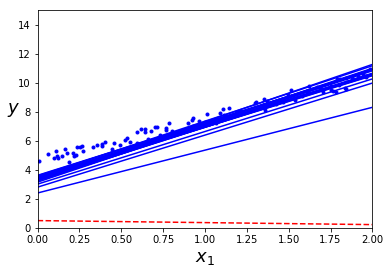

array([[ 4.51267812],
       [ 2.98602184]])

In [12]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) #only use one row of data!!!
        eta = learning_schedule(epoch * m + i) # decrease learning rate gradually!
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()  

theta

**By convention, we iterate rounds of m iterations; each round  is called an epoch (EPOCH = going through the training set a full time once...)**

While BATCH GD iterated 100 times through the whole training set, this code goes through the trining set only 50 times and reaches a good solution.

NOTE that since instances are picked randomly, some instance are picked several times per epoch, while others not at all. If you want to ensure the algo goes through every instance at each epoch, another approach is to shuffle the training set, then go trhough it instance by instance, and then shuffle it agian, and so on and so on. HOWEVER this converges more slowly. 

**To performe Linear Reg using SGD you can use SGDRegressor class, which defaults to optimizing the squared error cost function. The follwoing runs 50 epochs (n_iter=50), starting with a learning rate of 0.1 (eta0=0.1), using default learning schedule (different from the preceding one), and it does NOT use any regulatization (penalty=None).**

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50,
                       penalty=None,
                       eta0=0.1)
sgd_reg.fit(X, y.ravel())

#result should be the same as with the Normal Equation

sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.53460434]), array([ 2.9800263]))

### 1.6 Mini-batch Gradient Descent

At each step, instead of computing the gradients based on full training set (as in Batch BD), or based on just one instance (as in Stochastic GD), mini batch computes the gradients on small random sets of instacnes called **mini-batches**. 

**The Main Advantage:** performance boost from hardware optinmzation of matrix operations, especially when using GPUs. 

The algos progress in parameter space is less erratic than with SGD, espeically with fairly large mini-batches. As a result, minbatch GD willend up walking around a bit closer to the minimum than SGD, HOWEVER it may be harder for it to escape LOCAL minima (obvi this wont be the case in Linear regression cuz its concave).

[[ 4.49768581]
 [ 2.93854668]]


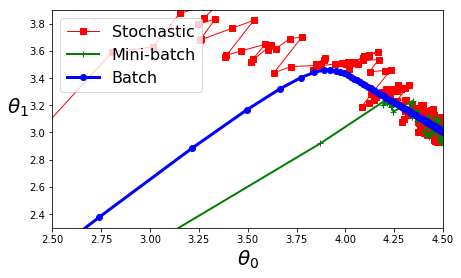

In [14]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

print(theta)
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()

**Linear reg training algo summary:** lets compare the algos for linear regression, remember:
- m = number of training instances
- n = number of features

![](pictures/Picture15.png)

# 2. Polynomial Regression
You CAN use a linear model to fit non-linear data. A simple way to do this is to add powers of each feature as a new features, then train a linear model on this extended set of features. This is called the polynomial Regression. 

Lets first generate some nonlinear data, based on a simple quadratic equation (plus some noise):

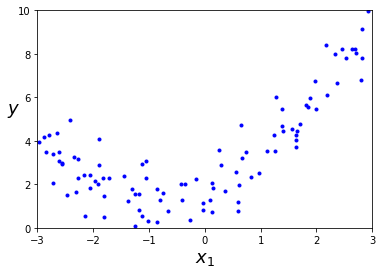

In [15]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Clearly a straight line wont work here. So lets use SKlearns PolynomialFeatures class to transofmr out training data, adding the square (2nd degree polynomial) of each feature in the training set as new features. 

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0:2]

array([[-0.75275929],
       [ 2.70428584]])

In [17]:
X_poly[0:2]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ]])

#### Neat, now I essentially just have extra features that are the squared value of the existing features!! Now I will just fit a Linear Regression Model tho this extended training data. 

[ 1.78134581] [[ 0.93366893  0.56456263]]


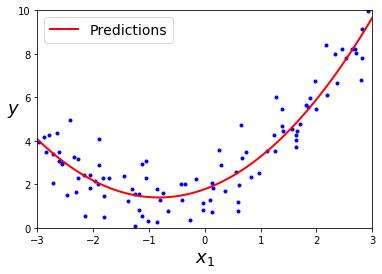

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_) # you should have 2 coefficients now!

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()


![](Picture16.emf)

<font color = red size=5> NOTE: when there are multiple features, Polynomical Regression is capable of finding relationships between features (which is something a plain Linear regression cannot do).</font>

This is made possible by the fact that Polynomial Features also add ALL combination of features up to  given degree. **For example: If there were two features, a and b, PolynomialFeatures with degree=3 would not only add the feature a2, a3, b2,b3, but also combinations ab, a2b, and ab2.**

WARNING:
![](pictures/Picture17.png)

# 3. Learning Curves

If you perform HIGH DEGREE polynomial regression, you will likely fit the training data much bettwe, but you risk overfitting. For example, see below: applying at 300degree polynomial model to the preceeding training data. 

**According to the above WARNING, there should be (n+d)!/d!n! features now! lets test that out first. **

In [19]:
from scipy.special import factorial

# 2 degrees 1 feature
num_features = factorial(1+2)/(factorial(2)*factorial(1))
print(num_features)

3.0


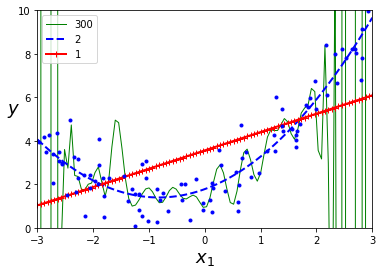

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


#### So the high degree polynomial regression model is severly overfitting.  Clearly the model that generalizes best is the QUADATRIC MODEL... with the polynomial degrees of 2. 


# Learning Curves

**Lurning curve:** Learning curves are a great way to test whether your model is overfitting or underfitting the traning data. **These are plots of the models performance on the training set and the validation set as a function of the training set size. ** To Generate the plots, simply treain the model several times on different sized subsets of the training set:

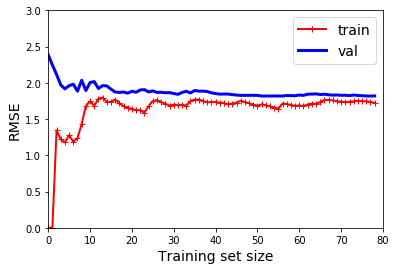

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()                                      # not shown


This deserves a bit of explanation. 

First, let’s look at the performance on the training data: when there
are just one or two instances in the training set, the model can fit them perfectly, which is why the
curve starts at zero. But as new instances are added to the training set, it becomes impossible for the
model to fit the training data perfectly, both because the data is noisy and because it is not linear at
all. So the error on the training data goes up until it reaches a plateau, at which point adding new
instances to the training set doesn’t make the average error much better or worse. 

Now let’s look at he performance of the model on the validation data. When the model is trained on very few training
instances, it is incapable of generalizing properly, which is why the validation error is initially quite
big. Then as the model is shown more training examples, it learns and thus the validation error slowly
goes down. However, once again a straight line cannot do a good job modeling the data, so the error
ends up at a plateau, very close to the other curve.These learning curves are typical of an underfitting model. Both curves have reached a plateau; they'e close and fairly high.



**NOTE: When your model is underfitting the training data, adding mroe training examples will not help. You need to use a more complex model or come up with better features**

Lets look at a 10th degree polynomial model:


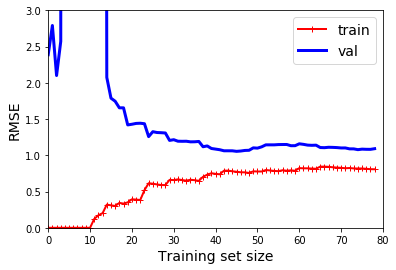

In [22]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()    


These learning curves look a bit like the previous ones, but there are two very important differences:
- The error on the training data is much lower than with the Linear Regression model.
- <font color=red> **There is a gap between the curves. This means that the model performs significantly better on the
training data than on the validation data, which is the hallmark of an overfitting model. However,
if you used a much larger training set, the two curves would continue to get closer.**</font> 

<font color=red size=5> PRO TIP: One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error. </font>

### The Bias/Variance Tradeoff

An important theoretical result of statistics and Machine Learning is the fact that a model's generalization error can be expressed as the sum of three very different errors:

- **Bias:** part of the generalization error is due to the wrong assumptions, such as assuming that the data is linear when it is actually quadratic. **A high-bias model is most likely to underfit the training data**
- **Variance:** this part is due to the model's exessive sensitvity to small variations in the training data. **A model with MANY DEGREES OF FREEDOM (such as a high-degree polynomial model) is likley to have high variance** and thus to OVERFIT the training data.
- **Irreducible error: **This is due to the noisiness of the data itself. The only way to reduce this part of the error is to clearn up the data or get new data!

<font color = red size=5> Increase a models complexity will typically increase its variance (and thus its likelihood to OVERFIT) while reducing a model complexity will increase its bias  and reduce variance(thus increase likelihood of UNDERFITTING ). **This is why its called a tradeoff.** </font>

# 4. Regularized Linear Models

As we saw in Chapters 1 and 2, a good way to reduce overfitting is to regularize a model (ie. constrain it). **The fewer degrees of freedom a model has, the harder it is for it to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees. 
**

<font color=red> <br>For a linear model, regularization is typically acheived by constraining the weights of the model. </font>

### 4.1 Ridge Regression

Ridge Regression is a regularized version of Linear Regression. A regularization term is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. **NOTE THAT REGULARIZATION SHOULD ONLY BE ADDED TO THE COST FUNCTION DURING TRAINING. ONCE THE MODEL IS TRAINED YOU WANT TO EVALUATION THE PERFORMANCE USING UNREGULARIZED PERFORMANCE MEASURE.**

NOTE: It is quite common for the cost function used during training to be different from the performance measure used for testing. Apart from regularization, another reason why they might be different is that a good training cost function should have
**optimization-friendly derivatives,** while the performance measure used for testing should be as close as possible to the final objective. A good example of this is a classifier trained using a cost function such as the log loss (discussed in a moment) but evaluated using precision/recall.

The regularization term is added to the standard MSE to get the ridgre regression cost function:

![](pictures/Picture18.png)

The hyperparameter α controls how much you want to regularize the model. If α = 0 then Ridge
Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and
the result is a flat line going through the data’s mean. Equation 4-8 presents the Ridge Regression cost
function

<font color = orange size=5><br>Note that the bias term $\theta_0$ is not regularized (the sum starts at i = 1, not 0). If we define w as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is simply equal to $½(∥ w ∥2)^2$: </font>

- where ∥ · ∥2 represents the ℓ2 norm of the weight vector. 
- For Gradient Descent, just add αw to the MSE gradient vector.
- It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the
scale of the input features. This is true of most regularized models.


As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent.</font> The pros and cons are the same. Below is the closed form solution (where A is the n × n identity matrix except with a 0 in the top-left cell, corresponding to the bias term).
![](pictures/Picture19.png)

The following plots show Ridge models trained on some linear data using differetn α values. 

On the left plain Ridge models are used, leading to linear predictions. 

On the right, the data is first expanded using PolynomialFeatures(degree=10), **then it is scaled using a StandardScaler, and finally the Ridge models are applied to the resulting features: this is Polynomial Regression with Ridge regularization.** <font color=red> Note how increasing α leads to flatter (i.e., less extreme, more reasonable) predictions; **this reduces the model’s variance but increases its bias.** 




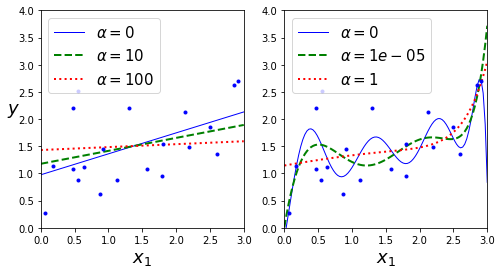

In [23]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution:

In [24]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]]))

ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]]))

sgd_reg = SGDRegressor(penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.predict([[1.5]]))


[[ 1.55071465]]
[[ 1.5507201]]
[ 1.13500145]


C:\Users\mciniello\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


<font color=red size=5> The penalty hyperparameter sets the type of regularization term to use. Specifying "l2" indicates
that you want SGD to add a regularization term to the cost function equal to half the square of the ℓ2
norm of the weight vector: this is simply Ridge Regression.</font>

### 4.2 Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (Lasso Regression)is another regulaized version of Linear Reg: Just like Ridge Regression, it adds a regularization term to the cost function, but it uses l1 norm (instead of l2 norm) of the weightr vector instead of "half of the square of the l2 norm".

![](pictures/Picture20.png)

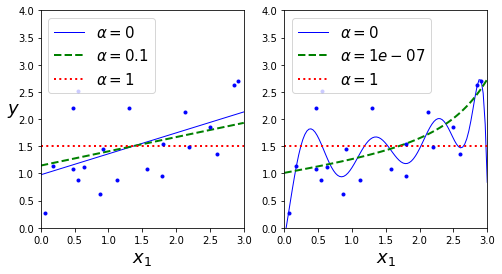

In [25]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.show()

**An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of
the least important features (i.e., set them to zero). For example, the dashed line in the right plot (with α = 10-7) looks quadratic, almost linear: all the weights for the high-degree polynomial features are equal to zero. In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).**

You can get a sense of why this is the case by looking at the figure below: on the top-left plot, the background contours (ellipses) represent an unregularized MSE cost function (α = 0), and the white circles show the Batch Gradient Descent path with that cost function. The foreground contours (diamonds) represent the ℓ1 penalty, and the triangles show the BGD path for this penalty only (α → ∞). Notice how the path first reaches θ1 = 0, then rolls down a gutter until it reaches θ2 = 0. On the
top-right plot, the contours represent the same cost function plus an ℓ1 penalty with α = 0.5. The global minimum is on the θ2 = 0 axis. BGD first reaches θ2 = 0, then rolls down the gutter until it reaches the global minimum. 

**The two bottom plots show the same thing but uses an ℓ2 penalty instead. The regularized minimum is closer to θ = 0 than the unregularized minimum, but the weights do not get fully eliminated.**

C:\Users\mciniello\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


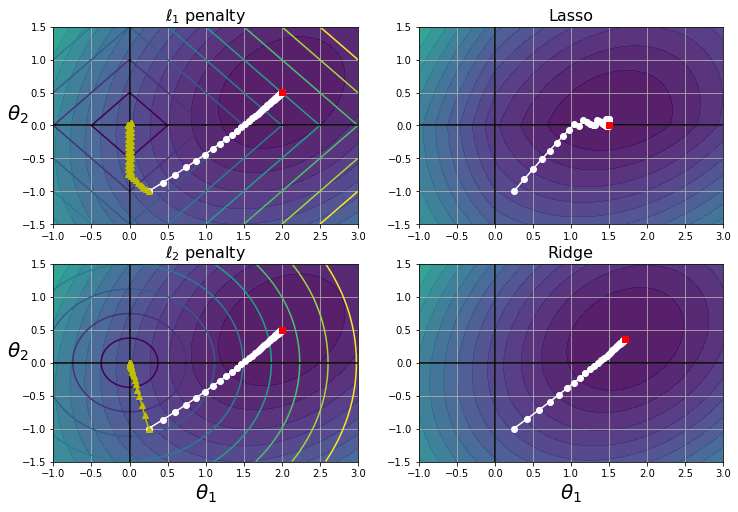

In [26]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])

for subplot in (221, 223):
    plt.subplot(subplot)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

for subplot in (223, 224):
    plt.subplot(subplot)
    plt.xlabel(r"$\theta_1$", fontsize=20)

plt.show()

### The Lasso cost function is not differentiable at θi = 0 (for i = 1, 2, ⋯, n), but Gradient Descent still works fine if you use a subgradient vector g instead when any θi = 0. The equation below shows a subgradient vector equation you can use for Gradient Descent with the Lasso cost function.

![](pictures/Picture21.png)

Here is a small Scikit-Learn example using the Lasso class. Note that you could instead use an
SGDRegressor(penalty="l1").

In [27]:
sgd_reg = SGDRegressor(penalty="l1", random_state=42)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.predict([[1.5]]))

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

[ 1.13498188]


C:\Users\mciniello\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 1.53788174])

### 4.3 Elastic Net
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and **you can control the mix ratio r**. When r=0, Elastic Net is equivaletn to a Ridge, and when r=1 it is equivalent to Lasso. 

![](pictures/Picture22.png)

<font color=red size=5> It's almost always preferable to have at least a little bit of regularization, so generally you should AVOID PLAIN LINEAR REGRESION. </font>
- Ridge is a good default, but 
- **if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features' weightes down to zero**. 
- In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated. 


Here is a short example using Scikit-Learn’s ElasticNet **(l1_ratio corresponds to the mix ratio r):**

In [28]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 1.54333232])

### 4.4 Early Stopping

A different way to regularize learning algos such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stoping. The below code shows a complex model (in this case, a high degree polynomial regression model) being trained using batch Gradient Descent. 

As the epochs go by, the algorithm learns and its prediction erros (RMSE) on the training set naturally go down, and so does its prediction error on the validation set. **HOWEVER after a while the validation error stops decreasing and actually starts to go back up** This indicated that the model has strted to OVERFIT the training data. With early stopping you just stop training as soon as the validation error reaches the minimum.

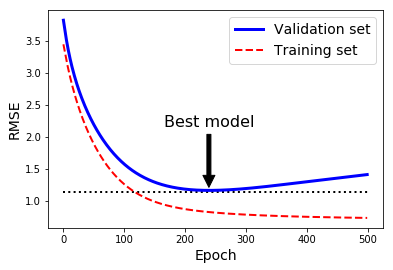

In [29]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()


<font color=red> With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. **One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.** </font>


**Below is a basic implementation of early stopping. Note that with warm_start=True, when the fit() method is called, it just continues training where
it left off instead of restarting from scratch.**

In [30]:
from sklearn.base import clone

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# 5. Logisitic Regression
 **Estimating Probabilities:** Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), **but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result**
 
 ![](pictures/Picture23.png)
 
 The Logistic - also called the logit, noted σ(·) - is a sigmoid function (ie. S-shaped) that outputs a number between 1 and 0. It is defined in the equation below:
 
 ![](Pictures/logreg2.png)
 
***Notice that σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so a Logistic Regression model predicts
1 if θT · x is positive, and 0 if it is negative.***

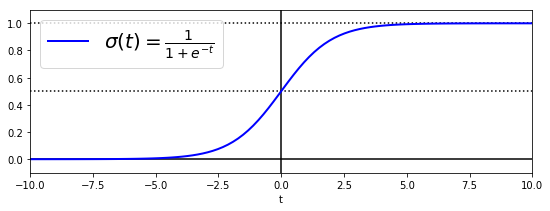

In [31]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

### 5.1 Training and Cost Function

The objective of training is to set the parameter vector theta so that the model estimates high probabilieis for positive instances (y=1) and low probabilities for negative instances (y=0). This idea is captures by the cost function for a single instance of x:

![](Pictures/Picture25.png)

**This cost function makes sense because – log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, – log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.**

<font color=orange size=5><br>The cost function over the whole training set is simply the **average** cost over all training instances. It can be written in a single expression (as you can verify easily), called the log loss:</font>

![](Pictures/Picture26.png)

The bad news is that there is no known closed-form equation to compute the value of θ that minimizes this cost function (there is no equivalent of the Normal Equation). **But the good news is that this cost function is convex**, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough). <font color=red size=4>The partial derivatives of the cost function with regards to the jth model parameter θj is given by the following Equation.</font>

![](Pictures/Picture27.png)

<font color=blue size =5>This equation looks very much like previous Equation: **for each instance it computes the prediction error and multiplies it by the jth feature value, and then it computes the average over all training instances.**</font>
Once you have the gradient vector containing all the partial derivatives you can use it in the Batch Gradient Descent algorithm. That’s it: you now know how to train a Logistic Regression model. For Stochastic GD you would of course just take one instance at a time, and for Mini-batch GD you would use a mini-batch at a time.

### 5.2 Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica


Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal width feature.
First let’s load the data:


In [32]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

print(iris.DESCR) #see full dataset description

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

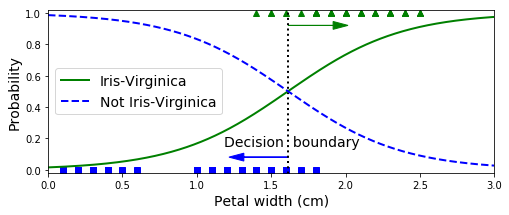

In [33]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm,
while the other iris flowers (represented by squares) generally have a smaller petal width, ranging
from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly
confident that the flower is an Iris-Virginica (it outputs a high probability to that class), while below
1 cm it is highly confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica”
class). 

**In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the predict() method rather than the predict_proba() method), it will return whichever class is the most likely.** <font color=red> Therefore, there is a **decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict thatthe flower is an Iris-Virginica, or else it will predict that it is not (even if it is not very confident):**

In [34]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

The plot below shows the same dataset but this time displaying two features: petal width and length. Once trained, the Logistic Regression classifier can estimate the probability that a new flower is an Iris-Virginica based on these two features. 
- The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary.
- Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right).

All the flowers beyond the top-right line have an over 90% chance of being Iris-Virginica according to the model.
![](Pictures/Picture28.png)

<font color = orange size = 5> NOTE: Just like the other linear models, Logistic Regression models can be regularized using ℓ1 or ℓ2 penalties. **Scitkit-Learn actually adds an ℓ2 penalty by default.**</font>

**Also the hyperparameter controlling the regulation strenght of a Scikit-Learn LogisticRegression model is not alpha (as in other linear modle), but its inverse: C. The higher the value of C, the less the model is regularized. **

### 5.3 Softmax Regression

The logisict regression model can be generalized to support MULTIPLE CLASSES directly, without haveing to train and combine multiple binary classifier. This is called **SOFTMAX Regressoin, or Multinomial Logisitic Regression. **

The idea is quite simple: **when given an instance x, the Softmax Regression model first computes a score sk(x) for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores.**

The equation to compute sk(x) should look familiar, as it is just like the equation for Linear Regression prediction:

![](Pictures/Picture29.png)

<font color=red size =3> Note that each class has its own dedicated parameter vector θk. All these vectors are typically stored as rows in a parameter matrix Θ.  **Once you have computed the score of every class for the instance x, you can estimate the probability k that the instance belongs to class k by running the scores through the softmax function: it computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials).</font>

![](Pictures/Picture30.png)

- K is the number of classes.
- s(x) is a vector containing the scores of each class for the instance x.
- σ(s(x))k is the estimated probability that the instance x belongs to class k given the scores of each class for that instance.

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with
the highest estimated probability (which is simply the class with the highest score). 
The argmax operator returns the value of a variable that maximizes a function. In this equation, it
returns the value of k that maximizes the estimated probability σ(s(x))k.

![](Pictures/Picture31.png)

<font color = green size=5>The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) so it should be used
only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one
picture.

Now that you know how the model estimates probabilities and makes predictions, let’s take a look at
training. The objective is to have a model that estimates a high probability for the target class (and
consequently a low probability for the other classes). 

Minimizing the cost function shown in Equation below, **called the cross entropy**, should lead to this objective because **it penalizes the model when it estimates a low probability for a target class.** <font size=5>Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes.</font>

![](Pictures/Picture32.png)

Y(i)k is equal to 1 if the target class for the ith instance is k; otherwise, it is equal to 0.
Notice that when there are just two classes (K = 2), this cost function is equivalent to the Logistic
Regression’s cost function (log loss).

### IMPORTANT NOTE ON CROSS ENTROPY:

Cross entropy originated from information theory. Suppose you want to efficiently transmit information about the weather every
day. If there are eight options (sunny, rainy, etc.), you could encode each option using 3 bits since 23 = 8. However, if you think it will be sunny almost every day, it would be much more efficient to code “sunny” on just one bit (0) and the other seven options on 4 bits (starting with a 1). Cross entropy measures the average number of bits you actually send per option. If your assumption about the weather is perfect, cross entropy will just be equal to the entropy of the weather itself (i.e., its intrinsic unpredictability). But if your assumptions are wrong (e.g., if it rains often), cross entropy will be greater by an amount called the Kullback–Leibler divergence. The cross entropy between two probability distributions p and q is defined as (at least when the distributions are discrete):

![](Pictures/Picture34.png)

The gradient vector of this cost function with regards to theta_k is given below:

![](Pictures/Picture33.png)

Now you can compute the gradient vector for every class, then use Gradient Descent (or any other
optimization algorithm) to find the parameter matrix Θ that minimizes the cost function.

Let’s use Softmax Regression to classify the iris flowers into all three classes.<font color=red size=5> Scikit-Learn’s LogisticRegression uses one-versus-all by default when you train it on more than two classes,** but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead.** </font>

You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver (see Scikit-Learn’s documentation for more details). 

It also applies ℓ2 regularization by default, which you can control using the hyperparameter C.


In [35]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[  6.33134077e-07   5.75276067e-02   9.42471760e-01]]


The below graph shows the resulting decision boundaries, represented by the background colors. Notice
that the decision boundaries between any two classes are linear. The figure also shows the
probabilities for the Iris-Versicolor class, represented by the curved lines (e.g., the line labeled with
0.450 represents the 45% probability boundary). Notice that the model can predict a class that has an
estimated probability below 50%. For example, at the point where all decision boundaries meet, all
classes have an equal estimated probability of 33%.

C:\Users\mciniello\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


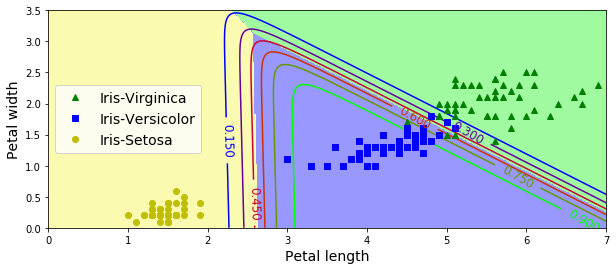

In [36]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

# Questions:

**1. What Linear Regression training algorithm can you use if you have a training set with millions of features?**

If you have a training set with millions of features you can use Stochastic Gradient Descent
or Mini-batch Gradient Descent, and perhaps Batch Gradient Descent if the training set fits in memory. **But you cannot use the Normal Equation because the computational complexity grows quickly (more than quadratically) with the number of features.**

**2. Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?**

<font color=red>If the features in your training set have very different scales, the cost function will have the shape of an elongated bowl, so the Gradient Descent algorithms will take a long time to
converge.</font> To solve this you should scale the data before training the model. Note that the Normal Equation will work just fine without scaling.

**3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?**

Nope! The cost function is convex!

**4. Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?**

If the optimization problem is convex (such as Linear Regression or Logistic Regression), **and assuming the learning rate is not too high,** then all Gradient Descent algorithms will approach the global optimum and end up producing fairly similar models. <font color=red>However, unless you gradually reduce the learning rate, Stochastic GD and Mini-batch GD will never truly converge; instead, they will keep jumping back and forth around the global optimum.</font> This means that even if you let them run for a very long time, these Gradient Descent algorithms will produce slightly different models.

**5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?**

If the validation error consistently goes up after every epoch, <font color=red>then one possibility is that the learning rate is too high and the algorithm is diverging.</font> If the training error also goes up, then this is clearly the problem and you should reduce the learning rate. **However, if the training error is not going up, then your model is overfitting the training set and you should stop training.**

**6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?**

In short, no. Due to their random nature, neither Stochastic Gradient Descent nor Mini-batch Gradient
Descent is guaranteed to make progress at every single training iteration. So if you
immediately stop training when the validation error goes up, you may stop much too early,
before the optimum is reached. A better option is to save the model at regular intervals, and
when it has not improved for a long time (meaning it will probably never beat the record),
you can revert to the best saved model.

**7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?**

- Stochastic Gradient Descent has the fastest training iteration since it considers only one training instance at a time, so it is generally the first to reach the vicinity of the global optimum (or Mini-batch GD with a very small mini-batch size). 
- **However, only Batch Gradient Descent will actually converge, given enough training time.** As mentioned, Stochastic GD and Mini-batch GD will bounce around the optimum, unless you gradually reduce the learning rate.


**8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?**

- If the validation error is much higher than the training error, **this is likely because your model is overfitting the training set.**
    - One way to try to fix this is to **reduce the polynomial degree**: <font color=red> a model with fewer degrees of freedom is less likely to overfit.</font> 
    - Another thing you can try is to regularize the model — <font color=red> **for example, by adding an ℓ2 penalty (Ridge) or an ℓ1 penalty (Lasso) to the cost function. This will also reduce the degrees of freedom of the model.**</font> 
    - Lastly, you can try to increase the size of the training set.

**9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?**

If both the training error and the validation error are almost equal and fairly high **the model is likely underfitting the training set, which means it has a high bias. You should try reducing the regularization hyperparameter α.**

**10. Why would you want to use:**
- Ridge Regression instead of Linear Regression?
- Lasso instead of Ridge Regression?
- Elastic Net instead of Lasso?

    - <font color=red>A model with some regularization typically performs better than a model without any regularization, so you should generally prefer Ridge Regression over plain Linear Regression. </font>
    - Lasso Regression uses an **ℓ1 penalty**, which tends to push the weights down to exactly zero. This leads to sparse models, where all weights are zero except for the most important weights. <font color=red>This is a way to perform feature selection automatically, which is good if you suspect that only a few features actually matter. When you are not sure, you should prefer Ridge Regression.</font>
    - <font color=red>Elastic Net is generally preferred over Lasso since Lasso may behave erratically in some cases (when several features are strongly correlated or when there are more features than training instances). However, it does add an extra hyperparameter to tune. </font> **If you just want Lasso without the erratic behavior, you can just use Elastic Net with an l1_ratio close to 1.**

**11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?**

<font color=red> If you want to classify pictures as outdoor/indoor and daytime/nighttime, since these are not exclusive classes (i.e., all four combinations are possible) you should train two Logistic Regression classifiers.</font> So Generally You should use multipled Logistic Regressions classifiers when the classes ARE NOT MUTUALLY EXCLUSIVE.